In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/HeiChole_data/train.csv")

In [11]:
df.groupby("phase").count()

,video_id,image_id
phase,,
0,2950,2950
1,19041,19041
2,3991,3991
3,7291,7291
4,1757,1757
5,6707,6707
6,1138,1138


In [15]:
df.groupby("phase").count()["video_id"].sum()


42875

In [18]:
valid_df = pd.read_csv("../data/HeiChole_data/dev.csv")
print(valid_df.groupby("phase").count())
valid_df.groupby("phase").count()["video_id"].sum()

       video_id  image_id
phase                    
0          1139      1139
1          5706      5706
2           995       995
3          2326      2326
4           574       574
5           839       839
6           685       685


12264

In [ ]:
{
    "Split": "Train", "Validation"
    "Preparation": (2950, 1139),
    "Calot triangle dissection": (19041, 5706),
    "Clipoping and cutting": (3991,995),
    "Galbladder dissection": (7291, 2326),
    "Galbladder packaging": (1757, 574),
    "Cleaning and coagulation": (6707, 839),
    "Galbladder retraction": (1138, 685),
    "Sum": (42875, 12264),
}

In [13]:
sample_df = df.groupby("phase").sample(n=, random_state=12345).reset_index()

ValueError: Cannot take a larger sample than population when 'replace=False'

In [9]:
sample_df

,index,video_id,image_id,phase
0,32130,15,171,0
1,2230,2,39,0
2,2225,2,15,0
3,7150,4,29,0
4,11798,6,227,0
...,...,...,...,...
2095,18365,7,4149,6
2096,18454,7,4073,6
2097,32069,14,2082,6
2098,20231,8,1511,6


In [12]:
sample_df.groupby("phase").count()

,index,video_id,image_id
phase,,,
0,300,300,300
1,300,300,300
2,300,300,300
3,300,300,300
4,300,300,300
5,300,300,300
6,300,300,300


In [20]:
from PIL import Image

In [29]:
image = Image.open("../data/HeiChole_data/HeiChole_1/250.jpg")

In [31]:
from torchvision import transforms

transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

transform(image)

tensor([[[ 0.7591,  0.0056, -0.1486,  ..., -2.1179, -2.1179, -2.1179],
         [ 1.0159, -0.4739,  1.2214,  ..., -2.1179, -2.1179, -2.1179],
         [-0.4911, -0.5767, -0.5596,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [ 1.0844,  1.3413,  1.2899,  ..., -2.1179, -2.1179, -2.1179],
         [ 0.7762,  1.0331,  1.1358,  ..., -2.1179, -2.1179, -2.1179],
         [ 0.2796,  0.4508,  0.8447,  ..., -2.1179, -2.1179, -2.1179]],

        [[ 0.3277, -0.4426, -0.5301,  ..., -1.9832, -1.9832, -1.9832],
         [ 0.5903, -0.8978,  0.8704,  ..., -1.9832, -1.9832, -1.9832],
         [-0.9503, -1.0378, -0.9853,  ..., -1.9832, -1.9832, -1.9832],
         ...,
         [ 0.1702,  0.4328,  0.3627,  ..., -2.0007, -2.0007, -2.0007],
         [-0.1099,  0.1176,  0.1877,  ..., -2.0007, -2.0007, -2.0007],
         [-0.6176, -0.4776, -0.0749,  ..., -2.0007, -2.0007, -2.0007]],

        [[ 0.4614, -0.3055, -0.3753,  ..., -1.8044, -1.8044, -1.8044],
         [ 0.7228, -0.7587,  1.0191,  ..., -1

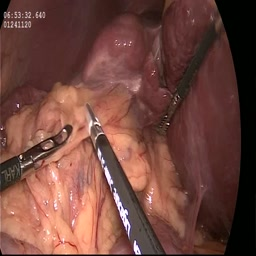

In [35]:
image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


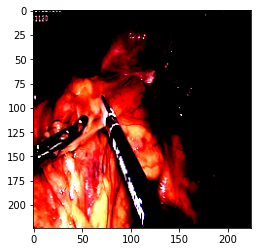

In [34]:
from matplotlib import pyplot as plt
plt.imshow(transform(image).permute(1, 2, 0).numpy())

In [ ]:
[[901, 172, 4, 10, 3, 8, 41],
[34, 5563, 32, 50, 5, 12, 10],
[4, 512, 362, 39, 46, 29, 1],
[1, 24, 17, 18, 399, 101, 14],
[37, 139, 36, 238, 121, 250, 18],
[186, 142, 14, 17, 61, 28, 237]]

In [8]:
with open("../data/pos_weight/triplet_pos_weight.txt", "r") as f:
    data = list(eval(f.read()))

In [11]:
import numpy as np

np_data = np.array(data)

ind = np.argsort(np_data)


ind

array([54, 55, 50, 38,  8, 41, 72, 42, 47, 85, 74, 80, 83, 46,  5, 49, 89,
       65, 75, 31, 70, 56, 67, 32, 91, 86, 35,  2, 43, 48, 77, 24, 15,  9,
       11, 81, 73, 25, 37, 45, 26, 53,  3,  0, 40, 93, 84, 71, 76, 39, 33,
       23, 87,  6, 90, 34, 64, 13, 44, 66, 14, 97, 52, 10, 51, 36, 21, 30,
       98, 28, 62, 92, 27, 22, 88,  4, 63, 99, 68, 95, 18, 69,  1, 78, 16,
       79, 29, 82, 96, 57, 59,  7, 61, 94, 12, 20, 58, 19, 60, 17])

In [16]:
list(ind[0:53])

[54,
 55,
 50,
 38,
 8,
 41,
 72,
 42,
 47,
 85,
 74,
 80,
 83,
 46,
 5,
 49,
 89,
 65,
 75,
 31,
 70,
 56,
 67,
 32,
 91,
 86,
 35,
 2,
 43,
 48,
 77,
 24,
 15,
 9,
 11,
 81,
 73,
 25,
 37,
 45,
 26,
 53,
 3,
 0,
 40,
 93,
 84,
 71,
 76,
 39,
 33,
 23,
 87]

In [12]:
np_data[ind]

array([     0,      0,      9,     24,     24,     24,     24,     27,
           30,     30,     36,     39,     41,     42,     44,     45,
           46,     51,     52,     60,     60,     63,     63,     73,
           82,     87,     88,     93,     96,    109,    111,    112,
          123,    136,    156,    159,    168,    168,    176,    207,
          211,    218,    228,    234,    243,    267,    267,    270,
          279,    285,    291,    294,    300,    355,    360,    373,
          411,    440,    440,    465,    469,    493,    497,    597,
          605,    672,    755,    786,    831,    835,    865,    958,
          968,    981,   1005,   1114,   1249,   1398,   1570,   1571,
         1808,   1857,   1920,   2715,   3367,   4606,   6207,   7700,
         7764,   7813,   8096,   8937,   9971,  10275,  11257,  12394,
        18349,  31785,  73696, 110743])

In [14]:
with open("../data/triplet_class_arg.npy", "wb") as f:
    np.save(f, ind)

In [18]:
arr = np.array([0,0,1,1,0,0,0,0,0,0,0])

np.where(arr == 1)[0]

array([2, 3])

In [19]:
arr

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

0:gallbladder 膽囊
1:cystic_plate
2:cystic_duct 膽囊管
3:cystic_artery 膽囊動脈
4:cystic_pedicle
5:blood_vessel 血管
6:fluid 體液
7:abdominal_wall_cavity 腹壁 腹腔
8:liver 肝
9:adhesion 黏附 黏膜?
10:omentum 網膜
11:peritoneum 腹膜
12:gut 腸道
13:specimen_bag 生物標本袋
14:null_target null

一些小發現

fluid 只會跟 irrigator 和 aspirate 放在一起， 所以判斷 fluid 等於 判斷前兩者

In [ ]:
{
    0: [0],
    1: [1,2,3,4,5],
    2: [6],
    3: [7],
    4: [8],
    5: [9, 10, 11],
    6: [12],
    7: [13],
    8: [14],
}

In [3]:
with open("../data/pos_weight/triplet_pos_weight.txt") as f:
    data = f.read().split(",")

data

['234',
 '1920',
 '93',
 '228',
 '1114',
 '44',
 '355',
 '8937',
 '24',
 '136',
 '597',
 '156',
 '11257',
 '440',
 '469',
 '123',
 '3367',
 '110743',
 '1808',
 '31785',
 '12394',
 '755',
 '981',
 '294',
 '112',
 '168',
 '211',
 '968',
 '835',
 '6207',
 '786',
 '60',
 '73',
 '291',
 '373',
 '88',
 '672',
 '176',
 '24',
 '285',
 '243',
 '24',
 '27',
 '96',
 '440',
 '207',
 '42',
 '30',
 '109',
 '45',
 '9',
 '605',
 '497',
 '218',
 '0',
 '0',
 '63',
 '7813',
 '18349',
 '8096',
 '73696',
 '9971',
 '865',
 '1249',
 '411',
 '51',
 '465',
 '63',
 '1570',
 '1857',
 '60',
 '270',
 '24',
 '168',
 '36',
 '52',
 '279',
 '111',
 '2715',
 '4606',
 '39',
 '159',
 '7700',
 '41',
 '267',
 '30',
 '87',
 '300',
 '1005',
 '46',
 '360',
 '82',
 '958',
 '267',
 '10275',
 '1571',
 '7764',
 '493',
 '831',
 '1398']

In [12]:
for i in range(22, 32):
    print(f"{i}: {data[i]}")

22: 981
23: 294
24: 112
25: 168
26: 211
27: 968
28: 835
29: 6207
30: 786
31: 60


In [ ]:
def predict_poses(self, boxes, img):
        image_patches = []
        for cx, cy, w, h in boxes:
            trans = get_affine_transform(np.array([cx, cy]), np.array([w, h]), self.patch_size)
            img_patch = cv2.warpAffine(img, trans, self.patch_size, flags=cv2.INTER_LINEAR)
            img_patch = self.pose_transform(img_patch)
            image_patches.append(img_patch)

        image_patches = torch.stack(image_patches).to(self.device)
        return self.pose_model(image_patch